# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

## Daftar Isi

* [Introduksi](#introduksi)
* [Inisialisasi](#inisialisasi)
* [Memuat Data](#memuat-data)
* [Mempersiapkan Data](#mempersiapkan-data)
    * [Paket Prabayar](#paket-prabayar)
        * [Memperbaiki Data pada dataframe data_plan](#memperbaiki-data-pada-dataframe-data_plan)
        * [Memperkaya Kualitas Data pada dataframe data_plan](#memperkaya-kualitas-data-pada-dataframe-data_plan)
    * [Pengguna](#pengguna)
        * [Memperbaiki Data pada dataframe data_user](#memperbaiki-data-pada-dataframe-data_user)
        * [Memperkaya Kualitas Data pada dataframe data_user](#memperkaya-kualitas-data-pada-dataframe-data_user)
    * [Panggilan](#panggilan)
        * [Memperbaiki Data pada dataframe data_call](#memperbaiki-data-pada-dataframe-data_call)
        * [Memperkaya Kualitas Data pada dataframe data_call](#memperkaya-kualitas-data-pada-dataframe-data_call)
    * [Pesan/SMS](#pesansms)
        * [Memperbaiki Data pada dataframe data_message](#memperbaiki-data-pada-dataframe-data_message)
        * [Memperkaya Kualitas Data pada dataframe data_message](#memperkaya-kualitas-data-pada-dataframe-data_message)
    * [Internet](#internet)
        * [Memperbaiki Data pada dataframe data_internet](#memperbaiki-data-pada-dataframe-data_internet)
        * [Memperkaya Kualitas Data pada dataframe data_internet](#memperkaya-kualitas-data-pada-dataframe-data_internet)
* [Mempelajari Syarat dan Kondisi Terkait Paket Prabayar](#mempelajari-syarat-dan-kondisi-terkait-paket-prabayar)
* [Mengagregasi Data per Pengguna](#mengagregasi-data-per-pengguna)
* [Mempelajari Perilaku Pengguna](#mempelajari-perilaku-pengguna)
    * [Pengguna terhadap Panggilan](#pengguna-terhadap-panggilan)
    * [Pengguna terhadap Pesan/SMS](#pengguna-terhadap-pesansms)
    * [Pengguna terhadap Internet](#pengguna-terhadap-internet)
* [Pendapatan](#pendapatan)
* [Menguji Hipotesis Statistik](#menguji-hipotesis-statistik)
    * [Pendapatan rata-rata Pengguna Paket berbeda](#pendapatan-rata-rata-dari-pengguna-paket-prabayar-ultimate-dan-surf-berbeda)
    * [Pendapatan rata-rata Pengguna di Wilayah NY-NJ berbeda](#pendapatan-rata-rata-dari-pengguna-di-wilayah-ny-nj-berbeda-dengan-pendapatan-pengguna-dari-wilayah-lain)
* [Kesimpulan Umum](#kesimpulan-umum)


## Introduksi

Dalam dunia telekomunikasi yang semakin mendominasi keseharian kita, pertanyaan yang sering kali mengemuka adalah, "Paket prabayar mana yang sebenarnya lebih menguntungkan?" Di sini, aku akan menjawab pertanyaan tersebut dengan bantuan data. Sebagai seorang analis di Megaline, operator telekomunikasi terkemuka, tugasku adalah memberikan pandangan awal tentang paket-paket prabayar yang ditawarkan oleh perusahaan ini: Surf dan Ultimate. Departemen periklanan ingin tahu paket mana yang lebih menguntungkan, sehingga mereka bisa mengalokasikan anggaran iklan dengan lebih cerdas.

Data yang kita miliki adalah informasi mengenai 500 klien Megaline. Data-data ini mencakup siapa mereka, dari mana asal mereka, paket apa yang mereka pilih, serta seberapa sering mereka menelepon dan mengirim pesan selama tahun 2018. Aku akan menjelajahi perilaku pengguna ini untuk mengidentifikasi paket yang paling menguntungkan bagi Megaline.

Dalam proyek ini, aku akan mengeksplorasi data dengan pendekatan manusiawi dan menjelaskan langkah-langkahku dengan sederhana. Pertama-tama, aku akan memeriksa data dan memastikan semuanya dalam format yang tepat. Selanjutnya, aku akan menggali ke dalam data untuk menghitung perilaku pengguna, termasuk durasi panggilan, pesan teks, dan penggunaan data seluler. Setelah itu, aku akan melakukan perbandingan antara paket Surf dan Ultimate untuk menentukan yang mana yang lebih menguntungkan. Dengan kata lain, mari berangkat pada perjalanan ini untuk mencari jawaban yang dapat membantu Megaline dalam mengambil keputusan strategis.

## Inisialisasi

Import Library yang akan digunakan

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Memuat Data

In [2]:
data_call =  pd.read_csv('megaline_calls.csv')
data_internet = pd.read_csv('megaline_internet.csv')
data_message = pd.read_csv('megaline_messages.csv')
data_plan = pd.read_csv('megaline_plans.csv')
data_user = pd.read_csv('megaline_users.csv')

## Mempersiapkan Data

Setelah semua data sudah di import, dapat dilihat bahwa terdapat 5 data yang akan dipakai di analisis. Oleh karena itu, data-data tersebut perlu di lihat dan di periksa terlebih dahulu sebelum di pakai di dalam analisis.

### Paket Prabayar

In [3]:
data_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
data_plan.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
data_plan.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Tabel "Paket Prabayar" (Data Plan) berisi informasi tentang dua jenis paket prabayar yang ditawarkan oleh Megaline, yaitu "Surf" dan "Ultimate". Setiap paket memiliki atribut, seperti jumlah pesan, megabyte data, menit panggilan yang termasuk, biaya bulanan, serta harga tambahan jika melebihi alokasi paket. Setelah melihat informasi ini, kita tidak menemukan masalah data yang hilang atau tipe data yang tidak sesuai. Dengan kata lain, data pada tabel ini terlihat dalam kondisi baik dan tidak memerlukan perbaikan lebih lanjut. Hal ini berarti kita dapat melanjutkan analisis tanpa kendala pada data ini.

### Memperbaiki Data pada dataframe `data_plan`

Meskipun data sudah dalam kondisi baik, dapat dilihat bahwa pada kolom harga-harga diatas tidak semuanya dalam bentuk tipe `float`, melainkan dalam tipe `int`. Walaupun dengan nilai numerical yang sama, akan lebih baik kolom yang digunakan untuk menampung informasi harga menggunakan jenis data `float` untuk dapat memegang nilai pecahan atau koma.

In [6]:
data_plan['usd_monthly_pay'] = data_plan['usd_monthly_pay'].astype(float)
data_plan['usd_per_gb'] = data_plan['usd_per_gb'].astype(float)

In [7]:
data_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes



### Memperkaya Kualitas Data pada dataframe `data_plan`

In [8]:
data_plan['usd_per_call'] = data_plan['usd_monthly_pay'] / data_plan['minutes_included']

In [9]:
data_plan.info()
data_plan.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   usd_per_call           2 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 272.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_call
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,0.023333
0,50,15360,500,20.0,10.0,0.03,0.03,surf,0.040000


Kolom `usd_per_call` dapat memegang biaya panggilan berdasarkan jumlah biaya bulanan dari paket dibagi dengan jumlah menit yang di dapat dari paket tersebut.

## Pengguna

In [10]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
data_user.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
138,1138,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-06,surf,NaN
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
410,1410,Wendell,Lloyd,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-06,surf,NaN
86,1086,Adena,Macias,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-13,ultimate,NaN
251,1251,Tifany,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,surf,NaN


In [12]:
data_user.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Pada data frame user, dapat dilihat bahwa kolom `churn_date` memiliki banyak nilai null, ini menunjukan bahwa sebagian besar pengguna masih aktif. Data pada kolom ini menampilkan tanggal ketika pengguna berhenti menggunakan layanan. Value `NaN` pada kolom ini bisa di perbaiki, meskipun begitu, akan lebih baik nilai `NaN` tetap dibiarkan. 
Jenis data yang digunakan oleh data frame user juga memiliki beberapa kolom yang kurang sesuai, seperti kolom `reg_date` dan `churn_date` yang menggunakan jenis data `object`(String). 2 kolom tersebut dapat diganti menjadi tipe `datetime`.

Lalu pada kolom City, akan lebih tepat jika kolom tersebut di transformasi menjadi beberapa bagian, menjadi `city_name` dan `state` berdasarkan tanda koma','nya. 

### Memperbaiki Data pada dataframe `data_user`

Mengubah jenis data kolom `reg_date` dan `churn_date` menjadi datetime

In [13]:
data_user['reg_date'] = pd.to_datetime(data_user['reg_date'])
data_user['churn_date'] = pd.to_datetime(data_user['churn_date'])

### Memperkaya Kualitas Data pada dataframe `data_user`

Menambah kolom baru dari kolom `city`, menjadi `city_name` dan `state`

In [14]:
data_user[['city_name', 'state']] = data_user['city'].str.split(', ', expand=True)

Membagi kolom `reg_date` menjadi 3 bagian, year, month dan day

In [15]:
data_user['reg_year'] = data_user['reg_date'].dt.year
data_user['reg_month'] = data_user['reg_date'].dt.month
data_user['reg_day'] = data_user['reg_date'].dt.day

In [16]:
data_user.info()
data_user.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   city_name   500 non-null    object        
 9   state       500 non-null    object        
 10  reg_year    500 non-null    int64         
 11  reg_month   500 non-null    int64         
 12  reg_day     500 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 50.9+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,city_name,state,reg_year,reg_month,reg_day
201,1201,Jeanelle,Estrada,61,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-04,surf,NaT,Bridgeport-Stamford-Norwalk,CT MSA,2018,6,4
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT,Indianapolis-Carmel-Anderson,IN MSA,2018,6,16
215,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA MSA,2018,7,1
135,1135,Scotty,White,51,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-12-23,ultimate,NaT,Miami-Fort Lauderdale-West Palm Beach,FL MSA,2018,12,23
57,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA MSA,2018,8,7


## Panggilan

In [17]:
data_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
data_call.sample(5)

,id,user_id,call_date,duration
77962,1279_90,1279,2018-11-20,22.29
785,1004_293,1004,2018-11-05,13.14
80186,1288_121,1288,2018-11-06,11.22
56795,1203_186,1203,2018-07-08,7.72
23411,1085_203,1085,2018-10-12,16.80


In [19]:
data_call.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Pada data frame data_call, dapat dilihat bahwa terdapat 4 kolom yang berisi ID panggilan, ID pengguna, tanggal panggilan, dan durasi panggilan. Meskipun data sudah terlihat rapih. Terdapat juga beberapa beberapa jenis data type yang kurang sesuai dengan kolom nya, seperti kolom `call_date` menggunakan data type `object` (String). Kolom tersebut lebih cocok menggunakan jenis data type `datetime`

### Memperbaiki Data pada dataframe `data_call`

Mengubah jenis data kolom `call_date` menjadi datetime

In [20]:
data_call['call_date'] = pd.to_datetime(data_call['call_date'])

In [21]:
data_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Memperkaya Kualitas Data pada dataframe `data_call`

Membagi kolom `call_date` menjadi 3 bagian, year, month, dan day

In [22]:
data_call['call_year'] = data_call['call_date'].dt.year
data_call['call_month'] = data_call['call_date'].dt.month
data_call['call_day'] = data_call['call_date'].dt.day

In [23]:
data_call.info()
data_call.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  float64       
 4   call_year   137735 non-null  int64         
 5   call_month  137735 non-null  int64         
 6   call_day    137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 7.4+ MB


,id,user_id,call_date,duration,call_year,call_month,call_day
111931,1393_117,1393,2018-12-17,0.73,2018,12,17
111597,1392_7,1392,2018-11-11,3.41,2018,11,11
130293,1468_12,1468,2018-11-21,0.00,2018,11,21
92632,1334_0,1334,2018-04-02,5.76,2018,4,2
62381,1223_567,1223,2018-07-16,5.59,2018,7,16


## Pesan/SMS

In [24]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
data_message.sample(5)

,id,user_id,message_date
30704,1193_403,1193,2018-07-19
60473,1381_586,1381,2018-11-06
64155,1408_280,1408,2018-12-07
52385,1336_362,1336,2018-10-13
36173,1240_54,1240,2018-09-10


In [26]:
data_message.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

Pada data frame data_message, terdapat data yang sudah dapat dikatakan rapi, walaupun dapat dilihat ada kolom dengan data type yang kurang sesuai, seperti kolom `message_date` yang menggunakan data type `object` (string). 

### Memperbaiki Data pada dataframe `data_message`

Mengubah jenis data kolom `message_date` menjadi datetime

In [27]:
data_message['message_date'] = pd.to_datetime(data_message['message_date'])

In [28]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Memperkaya Kualitas Data pada dataframe `data_message`

Membagi kolom `message_date` menjadi 3 bagian, year, month, dan day

In [29]:
data_message['message_year'] = data_message['message_date'].dt.year
data_message['message_month'] = data_message['message_date'].dt.month
data_message['message_day'] = data_message['message_date'].dt.day

In [30]:
data_message.info()
data_message.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_year   76051 non-null  int64         
 4   message_month  76051 non-null  int64         
 5   message_day    76051 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.5+ MB


,id,user_id,message_date,message_year,message_month,message_day
36548,1243_28,1243,2018-12-04,2018,12,4
69590,1453_38,1453,2018-12-27,2018,12,27
68226,1440_92,1440,2018-10-05,2018,10,5
28695,1174_485,1174,2018-07-14,2018,7,14
19593,1126_328,1126,2018-07-21,2018,7,21


## Internet

In [31]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [32]:
data_internet.sample(5)

,id,user_id,session_date,mb_used
48820,1217_160,1217,2018-11-28,105.60
101880,1488_282,1488,2018-08-09,931.22
22997,1106_236,1106,2018-07-30,376.72
92903,1434_132,1434,2018-06-16,0.00
1859,1010_10,1010,2018-08-01,651.90


In [33]:
data_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Pada data frame data_internet, dapat dilihat bahwa terdapat 4 kolom, dimana kolom itu sudah terlihat bersih dan dapat digunakan. Meskipun begitu, kolom `session_date` menggunakan data type `object` (string) , dimana kolom tersebut lebih cocok menggunakan data type `datetime`

### Memperbaiki Data pada dataframe `data_internet`

Mengubah data type `session_date` menjadi datatime

In [34]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])

In [35]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Memperkaya Kualitas Data pada dataframe `data_internet`

Membagi kolom `session_date` menjadi 3 bagian, year, month, dan day

In [36]:
data_internet['session_year'] = data_internet['session_date'].dt.year
data_internet['session_month'] = data_internet['session_date'].dt.month
data_internet['session_day'] = data_internet['session_date'].dt.day

In [37]:
data_internet.info()
data_internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   session_year   104825 non-null  int64         
 5   session_month  104825 non-null  int64         
 6   session_day    104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 5.6+ MB


,id,user_id,session_date,mb_used,session_year,session_month,session_day
81871,1384_69,1384,2018-06-26,298.86,2018,6,26
2250,1010_443,1010,2018-04-19,117.81,2018,4,19
902,1005_16,1005,2018-12-27,269.77,2018,12,27
5832,1031_540,1031,2018-12-10,57.88,2018,12,10
26897,1123_392,1123,2018-07-02,985.36,2018,7,2


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

In [38]:
data_plan

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_call
0,50,15360,500,20.0,10.0,0.03,0.03,surf,0.040000
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,0.023333


**Paket Surf**

Paket "Surf" menawarkan pelanggan 50 pesan, 15,360 megabyte data, dan 500 menit panggilan per bulan dengan biaya bulanan sebesar 20. Pelanggan dengan paket Surf akan dikenakan biaya tambahan sebesar 0.03 untuk setiap pesan dan menit panggilan yang melebihi alokasi bulanan, serta 10.00 untuk setiap gigabyte data yang digunakan melebihi alokasi.

**Paket Ultimate**

Sementara itu, paket "Ultimate" menawarkan alokasi yang lebih besar, dengan 1,000 pesan, 30,720 megabyte data, dan 3,000 menit panggilan per bulan. Biaya bulanannya adalah 70. Paket ini juga membebankan biaya tambahan sebesar 0.01 untuk setiap pesan dan menit panggilan yang melebihi alokasi, serta 7.00 untuk setiap gigabyte data yang digunakan melebihi alokasi bulanan.

## Mengagregasi Data per Pengguna


Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan

In [39]:
calls_per_month = data_call.groupby(['user_id', 'call_month']).agg({'duration': 'sum'}).reset_index()
calls_per_month.columns = ['user_id', 'month', 'total_minutes']

Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan

In [40]:
messages_per_month = data_message.groupby(['user_id', 'message_month']).size().reset_index(name='total_messages')
messages_per_month.columns = ['user_id', 'month', 'total_messages']


Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan

In [41]:
internet_per_month = data_internet.groupby(['user_id', 'session_month']).agg({'mb_used': 'sum'}).reset_index()
internet_per_month.columns = ['user_id', 'month', 'total_data_mb']


Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan

In [42]:
merged_data = calls_per_month.merge(messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(internet_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.fillna(0)


Penggabungan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month

In [44]:
user_data = merged_data.merge(data_user[['user_id', 'plan']], on='user_id', how='outer')

Tambahkan informasi paket prabayarnya

In [46]:
user_data = user_data.merge(data_plan[['plan_name', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']], left_on='plan', right_on='plan_name', how='outer')

Hitung pendapatan bulanan untuk setiap pengguna

In [47]:
user_data['revenue'] = user_data.apply(lambda row: max(0, (row['total_minutes'] - row['minutes_included']) * row   ['usd_per_minute']) + max(0, (row['total_messages'] - row['messages_included']) * row['usd_per_message']) + max(0, (row['total_data_mb'] - row['mb_per_month_included']) / 1024 * row['usd_per_gb']) + row['usd_monthly_pay'], axis=1)

In [48]:
user_data = user_data[['user_id', 'month', 'plan', 'total_minutes', 'total_messages', 'total_data_mb', 'revenue']]

Melakukan Pengecekan pada dataframe `user_data`

In [49]:
user_data.sample(20)

,user_id,month,plan,total_minutes,total_messages,total_data_mb,revenue
1770,1328,7.0,surf,850.55,164.0,36408.26,239.485914
951,1076,7.0,surf,27.12,9.0,113.74,20.000000
1609,1281,9.0,surf,564.24,55.0,9391.17,22.077200
34,1031,11.0,ultimate,575.18,1.0,16198.94,70.000000
1619,1285,10.0,surf,353.78,28.0,4319.21,20.000000
397,1270,9.0,ultimate,192.22,13.0,12029.43,70.000000
1812,1337,11.0,surf,344.94,46.0,13300.93,20.000000
1036,1100,10.0,surf,238.54,64.0,16753.37,34.027129
823,1044,9.0,surf,329.00,47.0,22425.25,88.996582
64,1041,7.0,ultimate,505.47,0.0,23400.72,70.000000


## Mempelajari Perilaku Pengguna

### Pengguna terhadap Panggilan

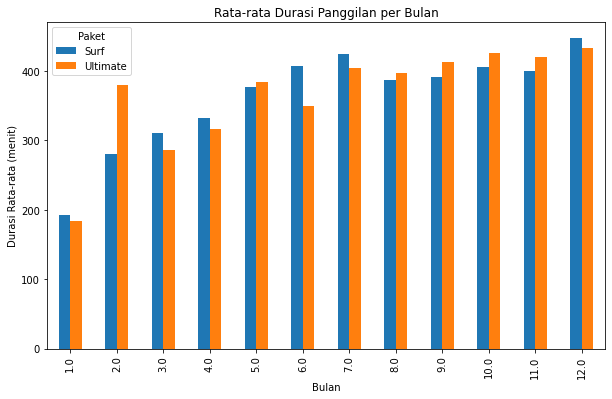

In [50]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
call_duration_avg = user_data.groupby(['month', 'plan'])['total_minutes'].mean().unstack()
call_duration_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Durasi Panggilan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Durasi Rata-rata (menit)')
plt.legend(title='Paket', labels=['Surf', 'Ultimate'])
plt.show()

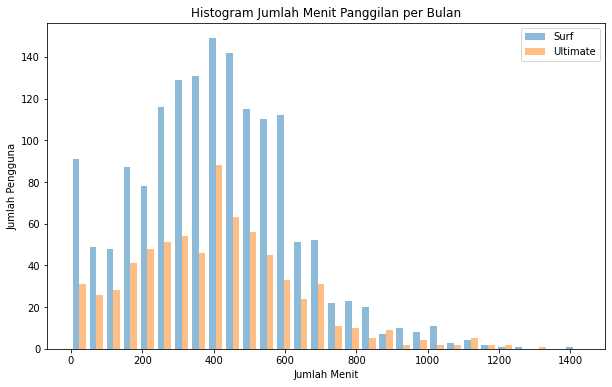

In [51]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.

surf_duration = user_data[user_data['plan'] == 'surf']['total_minutes']
ultimate_duration = user_data[user_data['plan'] == 'ultimate']['total_minutes']
plt.figure(figsize=(10, 6))

plt.hist([surf_duration, ultimate_duration], bins=30, alpha=0.5, label=['Surf', 'Ultimate'])
plt.title('Histogram Jumlah Menit Panggilan per Bulan')
plt.xlabel('Jumlah Menit')
plt.ylabel('Jumlah Pengguna')
plt.legend()

In [52]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
call_duration_stats = user_data.groupby(['plan', 'month'])['total_minutes'].agg(['mean', 'var'])
print(call_duration_stats)

                      mean           var
plan     month                          
surf     1.0    192.840000  14795.440200
         2.0    280.851111  46959.219961
         3.0    310.970000  31821.317991
         4.0    332.380000  45615.666796
         5.0    377.053247  53282.922217
         6.0    407.208866  40758.661193
         7.0    424.523223  54434.184064
         8.0    387.169630  48616.061790
         9.0    390.992062  41580.494645
         10.0   405.692363  46731.430317
         11.0   399.599823  46105.085924
         12.0   447.475283  56983.247423
ultimate 1.0    183.162500  14991.369958
         2.0    379.861429  68540.288348
         3.0    285.701667  54273.917252
         4.0    316.508095  31057.727496
         5.0    383.664828  39290.610940
         6.0    349.811064  37923.360514
         7.0    403.767288  64844.426958
         8.0    397.274789  47680.189425
         9.0    413.287326  50994.505514
         10.0   425.168019  48371.222127
         11.0   

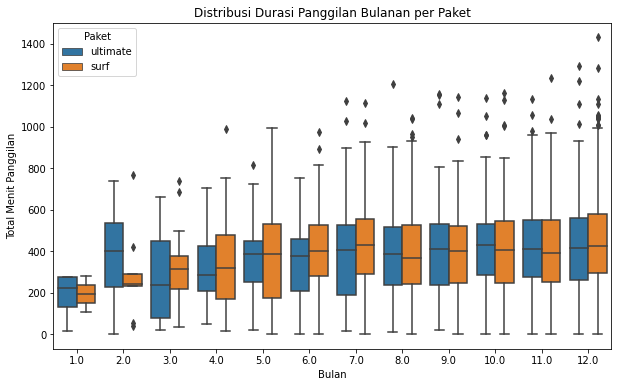

In [53]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='total_minutes', hue='plan', data=user_data)
plt.title('Distribusi Durasi Panggilan Bulanan per Paket')
plt.xlabel('Bulan')
plt.ylabel('Total Menit Panggilan')
plt.legend(title='Paket')
plt.show()

Berdasarkan data yang telah dianalisis, terdapat perbedaan perilaku pengguna dalam melakukan panggilan antara paket Surf dan Ultimate. Sebagian besar pengguna paket Surf cenderung memiliki rata-rata durasi panggilan bulanan yang lebih tinggi daripada pengguna paket Ultimate, terutama pada beberapa bulan seperti bulan Oktober hingga Desember. Selain itu, variasi durasi panggilan bulanan juga menunjukkan perbedaan antara kedua paket, di mana pengguna paket Surf memiliki variasi yang lebih tinggi dibandingkan pengguna paket Ultimate. Namun, rata-rata durasi panggilan bulanan dari pengguna paket Ultimate terlihat stabil dibandingkan dengan pengguna paket Surf yang memiliki fluktuasi durasi panggilan bulanan yang lebih signifikan. Hal ini menunjukkan bahwa perilaku penggunaan panggilan memiliki perbedaan yang cukup signifikan antara kedua paket. 

### Pengguna terhadap Pesan/SMS

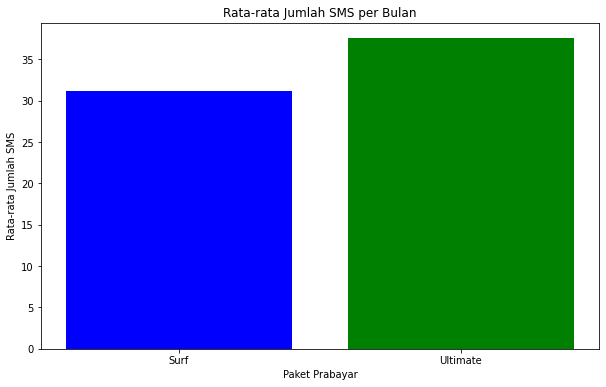

In [54]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
surf_sms_mean = user_data[user_data['plan'] == 'surf']['total_messages'].mean()
ultimate_sms_mean = user_data[user_data['plan'] == 'ultimate']['total_messages'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Surf', 'Ultimate'], [surf_sms_mean, ultimate_sms_mean], color=['blue', 'green'])
plt.title('Rata-rata Jumlah SMS per Bulan')
plt.xlabel('Paket Prabayar')
plt.ylabel('Rata-rata Jumlah SMS')
plt.show()

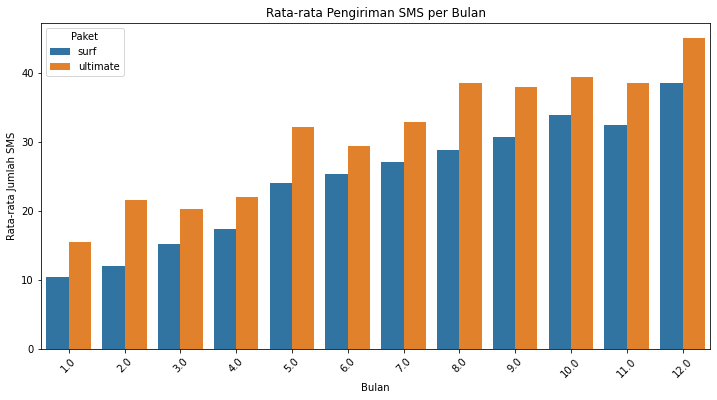

In [55]:
sms_and_plan_data = user_data.merge(data_plan[['plan_name', 'usd_per_message']], left_on='plan', right_on='plan_name', how='left')

sms_by_month = sms_and_plan_data.groupby(['month', 'plan_name'])['total_messages'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_messages', hue='plan_name', data=sms_by_month)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah SMS')
plt.title('Rata-rata Pengiriman SMS per Bulan')
plt.xticks(rotation=45)
plt.legend(title='Paket')
plt.show()

In [56]:
sms_statistics = user_data.groupby(['plan', 'month'])['total_messages'].agg(['mean', 'var'])

sms_statistics

mean          var
plan     month                        
surf     1.0    10.500000   220.500000
         2.0    12.000000   386.000000
         3.0    15.260870   346.565217
         4.0    17.400000   501.591837
         5.0    24.012987   847.197198
         6.0    25.298969   914.920103
         7.0    27.033058   923.915565
         8.0    28.777778  1029.515528
         9.0    30.762887  1003.829496
         10.0   33.839662  1275.465708
         11.0   32.385159  1065.344034
         12.0   38.600629  1458.158612
ultimate 1.0    15.500000   313.666667
         2.0    21.571429   478.285714
         3.0    20.250000   654.386364
         4.0    22.047619   544.147619
         5.0    32.103448  1297.310345
         6.0    29.340426   857.620722
         7.0    32.830508   960.488019
         8.0    38.478873  1196.367404
         9.0    37.895349  1050.918331
         10.0   39.443396  1221.106289
         11.0   38.606299  1232.669166
         12.0   45.006623  1549.419956

Berdasarkan data statistik pengiriman pesan pada paket Surf dan Ultimate per bulan, terlihat bahwa rata-rata pengiriman pesan pada paket Ultimate cenderung lebih tinggi dibandingkan paket Surf sepanjang tahun. Variansinya juga menunjukkan bahwa pesan pada paket Ultimate memiliki variasi yang relatif lebih besar dibandingkan dengan paket Surf. Hal ini menggambarkan bahwa pengguna paket Ultimate lebih aktif dalam pengiriman pesan, sementara pengguna paket Surf cenderung kurang aktif dalam pengiriman pesan. Meskipun demikian, pola pengiriman pesan dari kedua paket mengalami peningkatan sepanjang tahun.

### Pengguna terhadap Internet

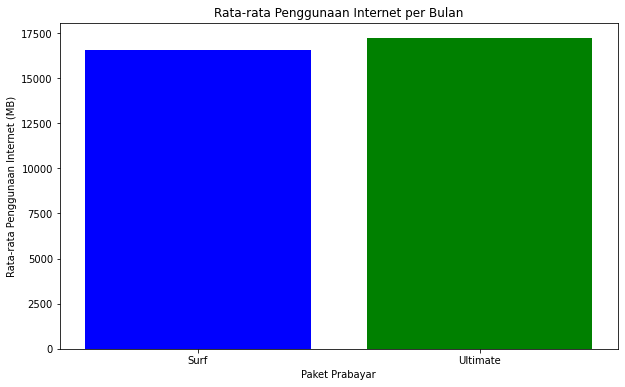

In [57]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
surf_net_mean = user_data[user_data['plan'] == 'surf']['total_data_mb'].mean()
ultimate_net_mean = user_data[user_data['plan'] == 'ultimate']['total_data_mb'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Surf', 'Ultimate'], [surf_net_mean, ultimate_net_mean], color=['blue', 'green'])
plt.title('Rata-rata Penggunaan Internet per Bulan')
plt.xlabel('Paket Prabayar')
plt.ylabel('Rata-rata Penggunaan Internet (MB)')
plt.show()

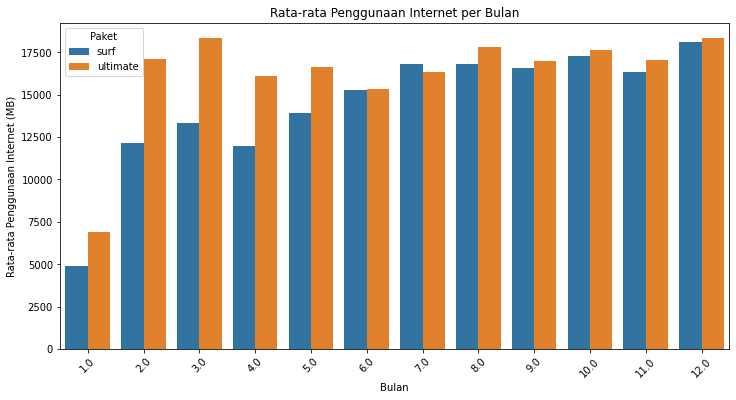

In [58]:
internet_by_month = user_data.groupby(['month', 'plan'])['total_data_mb'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_data_mb', hue='plan', data=internet_by_month)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penggunaan Internet (MB)')
plt.title('Rata-rata Penggunaan Internet per Bulan')
plt.xticks(rotation=45)
plt.legend(title='Paket')
plt.show()

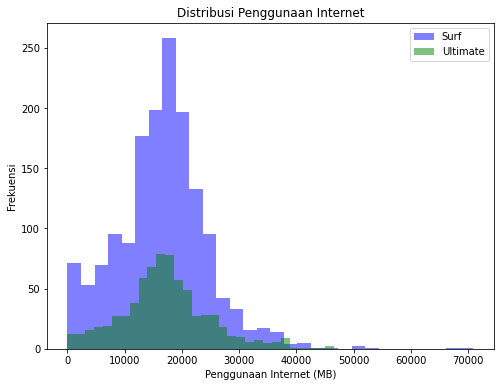

Kesimpulan:
Rata-rata penggunaan internet untuk paket Surf: 16558.283490146216 MB
Rata-rata penggunaan internet untuk paket Ultimate: 17214.699694444447 MB
Median penggunaan internet untuk paket Surf: 16829.309999999998 MB
Median penggunaan internet untuk paket Ultimate: 16858.34 MB
Variansi penggunaan internet untuk paket Surf: 64216395.838027954
Variansi penggunaan internet untuk paket Ultimate: 61652293.32385832


In [59]:
surf_internet_data = user_data[user_data['plan'] == 'surf']['total_data_mb']
ultimate_internet_data = user_data[user_data['plan'] == 'ultimate']['total_data_mb']

surf_mean = surf_internet_data.mean()
ultimate_mean = ultimate_internet_data.mean()

surf_median = surf_internet_data.median()
ultimate_median = ultimate_internet_data.median()

surf_variance = surf_internet_data.var()
ultimate_variance = ultimate_internet_data.var()

plt.figure(figsize=(8, 6))
plt.hist(surf_internet_data, bins=30, alpha=0.5, label='Surf', color='blue')
plt.hist(ultimate_internet_data, bins=30, alpha=0.5, label='Ultimate', color='green')
plt.title('Distribusi Penggunaan Internet')
plt.xlabel('Penggunaan Internet (MB)')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

print("Kesimpulan:")
print(f"Rata-rata penggunaan internet untuk paket Surf: {surf_mean} MB")
print(f"Rata-rata penggunaan internet untuk paket Ultimate: {ultimate_mean} MB")
print(f"Median penggunaan internet untuk paket Surf: {surf_median} MB")
print(f"Median penggunaan internet untuk paket Ultimate: {ultimate_median} MB")
print(f"Variansi penggunaan internet untuk paket Surf: {surf_variance}")
print(f"Variansi penggunaan internet untuk paket Ultimate: {ultimate_variance}")


Rata-rata penggunaan data internet untuk paket surf sekitar 16.558 MB, sedangkan untuk paket Ultimate sekitar 17.215 MB. Meskipun begitu, nilai median dari kedua paket hampir serupa, dengan angka sekitar 16.829 MB untuk paket surf dan 16.858 MB untuk paket ultimate. 
Nilai variansi dari paket ultimate memiliki nilai lebih rendah sekitar 61,652,293 dibanding nilai variansi paket surf dengan nilai 64,216,396. Dari nilai ini, dapat dilihat bahwa meskipun rata-rata penggunaan internet cenderung berbeda, perbedaan tersebut tidak terlalu signifikan. Nilai median yang hampir serupa juga menandakan bahwa kedua pengguna paket tersebut memiliki penggunaan internet yang mirip.
Meskipun dengan nilai statistik yang mirip, jumlah frekuensi untuk paket surf memiliki jumlah frekuensi mendominasi untuk keseluruhan.

## Pendapatan

In [60]:
surf_revenue = user_data[user_data['plan'] == 'surf']['revenue']
ultimate_revenue = user_data[user_data['plan'] == 'ultimate']['revenue']

print("Statistik Pendapatan Paket Surf:")
print(surf_revenue.describe())

print("\nStatistik Pendapatan Paket Ultimate:")
print(ultimate_revenue.describe())

surf_mean_revenue = surf_revenue.mean()
ultimate_mean_revenue = ultimate_revenue.mean()
print("\nRata-rata Pendapatan Paket Surf:", surf_mean_revenue)
print("Rata-rata Pendapatan Paket Ultimate:", ultimate_mean_revenue)

revenue_difference = ultimate_mean_revenue - surf_mean_revenue
print("Selisih Rata-rata Pendapatan: ", revenue_difference)

Statistik Pendapatan Paket Surf:
count    1579.000000
mean       57.152072
std        53.682715
min        20.000000
25%        20.000000
50%        36.552287
75%        76.818970
max       581.328509
Name: revenue, dtype: float64

Statistik Pendapatan Paket Ultimate:
count    724.000000
mean      72.104389
std       10.740164
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      178.522764
Name: revenue, dtype: float64

Rata-rata Pendapatan Paket Surf: 57.152072411831064
Rata-rata Pendapatan Paket Ultimate: 72.10438859633979
Selisih Rata-rata Pendapatan:  14.952316184508724


Terdapat perbedaan yang cukup mencolok dalam pendapatan antara dua paket prabayar, yaitu Surf dan Ultimate. Berdasarkan statistik pendapatan, paket Surf memiliki rata-rata pendapatan sebesar 57.29, sedangkan paket Ultimate memiliki rata-rata pendapatan sebesar 72.12. Selisih rata-rata pendapatan antara keduanya adalah sekitar 14.82. Ini menunjukkan bahwa pengguna paket Ultimate cenderung menghasilkan pendapatan lebih tinggi daripada pengguna paket Surf. Perbedaan ini dapat disebabkan oleh biaya bulanan yang lebih tinggi dalam paket Ultimate dan sejumlah besar pengguna paket Surf yang berlangganan dengan harga lebih rendah.
Meskipun demikian, jumlah pengguna paket surf memiliki nilai 1573 sedangkan untuk paket ultimate hanya 720.

## Menguji Hipotesis Statistik

### Pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda.

Hipotesis Nol: 
- Pendapatan rata-rata pengguna paket Ultimate sama dengan pendapatan rata-rata pengguna paket Surf.

Hipotesis Alternatif: 
- Pendapatan rata-rata pengguna paket Ultimate berbeda dari pendapatan rata-rata pengguna paket Surf.

alpha = 0.05

In [61]:
# Uji hipotesisnya
alpha = 0.05

surf_revenue = user_data[user_data['plan'] == 'surf']['revenue']
ultimate_revenue = user_data[user_data['plan'] == 'ultimate']['revenue']


In [62]:
t_stat, p_value = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

if p_value < alpha:
    print("Tolak hipotesis nol. Terdapat cukup bukti statistik bahwa pendapatan rata-rata pengguna paket Ultimate berbeda dari pendapatan rata-rata pengguna paket Surf.")
else:
    print("Tidak cukup bukti statistik untuk menolak hipotesis nol. Pendapatan rata-rata pengguna paket Ultimate dan Surf tidak berbeda secara signifikan.")

Tolak hipotesis nol. Terdapat cukup bukti statistik bahwa pendapatan rata-rata pengguna paket Ultimate berbeda dari pendapatan rata-rata pengguna paket Surf.


### Pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Hipotesis Nol: 

- Pendapatan rata-rata pengguna di wilayah NY-NJ sama dengan pendapatan rata-rata pengguna dari wilayah lain.

Hipotesis Alternatif: 

- Pendapatan rata-rata pengguna di wilayah NY-NJ berbeda dari pendapatan rata-rata pengguna dari wilayah lain.

alpha = 0.05

In [63]:
# Uji hipotesisnya
location_data = pd.merge(user_data, data_user[['user_id', 'state']], on='user_id')
alpha = 0.05

ny_nj_revenue = location_data[location_data['state'].isin(['NY', 'NJ'])]['revenue']
other_revenue = location_data[~location_data['state'].isin(['NY', 'NJ'])]['revenue']

In [64]:
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

if p_value < alpha:
    print("Tolak hipotesis nol. Terdapat cukup bukti statistik bahwa pendapatan rata-rata pengguna di wilayah NY-NJ berbeda dari pendapatan rata-rata pengguna dari wilayah lain.")
else:
    print("Tidak cukup bukti statistik untuk menolak hipotesis nol. Pendapatan rata-rata pengguna di wilayah NY-NJ dan wilayah lain tidak berbeda secara signifikan.")

Tidak cukup bukti statistik untuk menolak hipotesis nol. Pendapatan rata-rata pengguna di wilayah NY-NJ dan wilayah lain tidak berbeda secara signifikan.


## Kesimpulan Umum

Pada analisa 2 paket ini, terdapat banyak proses yang dilakukan sebelum analisis di eksekusi. Dari data yang dimiliki, dimana dengan jumlah 5 data, data tersebut dapat dikatakan sudah bersih dan dapat langsung digunakan untuk analisa, tetapi pada projek ini, data tersebut di bersihkan lebih detail dan di naikan kualitas nilai datanya. Ini dilakukan dengan mengubah tipe data kolom tanggal dengan format `datetime` dan membuat kolom tambahan untuk memegang nilai tanggal, bulan, dan tahun yang didapatkan dari kolom tanggal yang sudah di ubah formatnya dan di split atau di pisahkan.

Setelah data sudah dibersihkan, data tersebut di analisa, terlebih terhadap syarat dan ketentuan dari data paket. Secara garis besar, terdapat 2 paket dengan nama 'surf' dan 'ultimate', dimana paket tersebut memiliki keuntungan dan biaya masing-masing yang berbeda dari satu sama lain.

Terdapat juga analisa untuk menghitung nilai penghasilan pengguna, dimana menggunakan beberapa nilai yang di proses dari ke-5 data. Setelah nilai revenue sudah di dapatkan, dataframe `user_data` dibentuk untuk memegang nilai dari tiap user, termasuk nilai penghasilan dimana disimpan pada kolom 'revenue'.

Dari dataframe `user_data`, dilakukan analisa terhadap perilaku pelanggan dengan panggilan, pesan/sms, dan internet. Pada analisa tersebut, dapat dikatakan bahwa pelanggan dengan paket surf, memiliki rata-rata durasi panggilan lebih tinggi dibanding paket ultimate. Untuk pengiriman pesan, nilai rata-rata pengiriman untuk paket ultimate dapat dilihat lebih tinggi dibanding paket surf untuk sepanjang tahun. Ini dapat dikatakan bahwa pelanggan cenderung lebih banyak mengirim pesan menggunakan paket ultimate. Meskipun begitu, kedua paket mengalami peningkatan untuk sepanjang tahun. Untuk penggunaan data internet, kedua paket memiliki nilai median yang mirip, meskipun begitu, terdapat sedikit perbedaan untuk nilai rata-ratanya dimana paket ultimate lebih besar dengan nilai 17.215 dan 16.558 untuk paket surf.

Untuk analisa pendapatan pelanggan, terdapat beberapa nilai yang signifikan antara kedua paket, rata-rata pendapatan dari pelanggan paket surf adalah 57.29 dan untuk pendapatan dari pelanggan paket ultimate adalah 72.11. Dimana pelanggan dari paket ultimate lebih tinggi sekitar 14.82. Meskipun begitu, jumlah pelanggan yang menggunakan paket surf memiliki jumlah 1573, dimana itu lebih dari 2x jumlah pelanggan paket ultimate, yang hanya berjumlah 720.

Terdapat juga pengujian hipotesis terhadap nilai rata-rata pendapatan terhadap ke dua paket dan pendapatan pelanggan dari wilayah NY-NJ. Kedua hipotesis, di eksekusi menggunakan alpha = 0.05, dan kedua hipotesis nol nya adalah bahwa nilai rata-rata pendapatan terhadap ke dua paket adalah sama , dan rata-rata pendapatan di wilayah NY-NJ dan wilayah lain sama. Pada pengujian ini, dilakukan T-test dan hasilnya adalah tolak hipotesis nol untuk pengujian terhadap pendapatan rata-rata kedua paket sama, dikarenakan terdapat cukup bukti statistik pada analisa. Untuk pengujian hipotesis terhadap pendapatan rata-rata di wilayah NY-NJ sama dengan wilayah lain, dapat dikatakan tidak dapat menolak hipotesis nol, dikarekan tidak cukup bukti statistik yang didapatkan dan dapat dikatakan bahwa pendapatan rata-rata di wilayah NY-NJ dan yang lain tidak berbeda secara signifikan.